In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Rescaling, GlobalAveragePooling2D, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import EfficientNetV2S
import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs available:")
    for gpu in gpus:
        print(gpu)
    print("\nTensorFlow is using the following GPU(s):")
    print(tf.config.experimental.get_visible_devices('GPU'))
else:
    print("No GPUs found. TensorFlow is running on CPU.")

GPUs available:
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

TensorFlow is using the following GPU(s):
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
!nvidia-smi

Tue Dec 10 02:04:18 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.41                 Driver Version: 561.03         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...    On  |   00000000:01:00.0 Off |                  N/A |
| N/A   37C    P8              1W /   95W |       0MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
train_dir = "/mnt/c/Capstone Project/Model/Database/Kulkas/Train"
val_dir = "/mnt/c/Capstone Project/Model/Database/Kulkas/CV"
test_dir = "/mnt/c/Capstone Project/Model/Database/Kulkas/Test"

train_datagen = ImageDataGenerator(
    # rescale = 1/255.,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(
    # rescale = 1/255.,
)

test_datagen = ImageDataGenerator(
    # rescale = 1/255.,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

Found 79427 images belonging to 70 classes.
Found 26617 images belonging to 70 classes.
Found 33464 images belonging to 70 classes.


In [10]:
model = tf.keras.models.load_model('../Deployed/Test.h5')

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
if tf.config.list_physical_devices('GPU'):
    print ("Pakai GPU")
else:
    print("Pake CPU")

Pakai GPU


In [11]:
history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=20)

Epoch 1/20
 794/2483 ━━━━━━━━━━━━━━━━━━━━ 15:53 565ms/step - accuracy: 0.8927 - loss: 0.4716

2024-12-10 02:19:37.833248: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng48{k2=15,k6=2,k13=0,k14=0,k22=0} for conv (f32[3,160,16,16]{3,2,1,0}, u8[0]{0}) custom-call(f32[3,768,16,16]{3,2,1,0}, f32[160,768,1,1]{3,2,1,0}), window={size=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2024-12-10 02:19:37.834866: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 6.398089495s
Trying algorithm eng48{k2=15,k6=2,k13=0,k14=0,k22=0} for conv (f32[3,160,16,16]{3,2,1,0}, u8[0]{0}) custom-call(f32[3,768,16,16]{3,2,1,0}, f32[160,768,1,1]{3,2,1,0}), window={size=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"cudnn_conv_backe

2483/2483 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 0.8935 - loss: 0.4650

/home/nicholas_tanugroho/miniconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-12-10 02:35:34.182282: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4100', 16 bytes spill stores, 16 bytes spill loads

2024-12-10 02:40:41.743956: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4093', 4 bytes spill stores, 4 bytes spill loads

2024-12-10 02:40:41.807430: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spill

2483/2483 ━━━━━━━━━━━━━━━━━━━━ 1766s 700ms/step - accuracy: 0.8935 - loss: 0.4649 - val_accuracy: 0.7573 - val_loss: 2.0637
Epoch 2/20
2483/2483 ━━━━━━━━━━━━━━━━━━━━ 1710s 689ms/step - accuracy: 0.9017 - loss: 0.4246 - val_accuracy: 0.7568 - val_loss: 2.0917
Epoch 3/20
2483/2483 ━━━━━━━━━━━━━━━━━━━━ 1389s 559ms/step - accuracy: 0.9024 - loss: 0.4200 - val_accuracy: 0.7597 - val_loss: 2.0483
Epoch 4/20
2483/2483 ━━━━━━━━━━━━━━━━━━━━ 1361s 548ms/step - accuracy: 0.9051 - loss: 0.4060 - val_accuracy: 0.7621 - val_loss: 2.0840
Epoch 5/20
2483/2483 ━━━━━━━━━━━━━━━━━━━━ 1354s 545ms/step - accuracy: 0.9019 - loss: 0.4191 - val_accuracy: 0.7624 - val_loss: 2.1683
Epoch 6/20
2483/2483 ━━━━━━━━━━━━━━━━━━━━ 1361s 548ms/step - accuracy: 0.9002 - loss: 0.4237 - val_accuracy: 0.7614 - val_loss: 2.1467
Epoch 7/20
2483/2483 ━━━━━━━━━━━━━━━━━━━━ 1367s 550ms/step - accuracy: 0.9018 - loss: 0.4343 - val_accuracy: 0.7666 - val_loss: 2.0539
Epoch 8/20
2483/2483 ━━━━━━━━━━━━━━━━━━━━ 1360s 547ms/step - accur

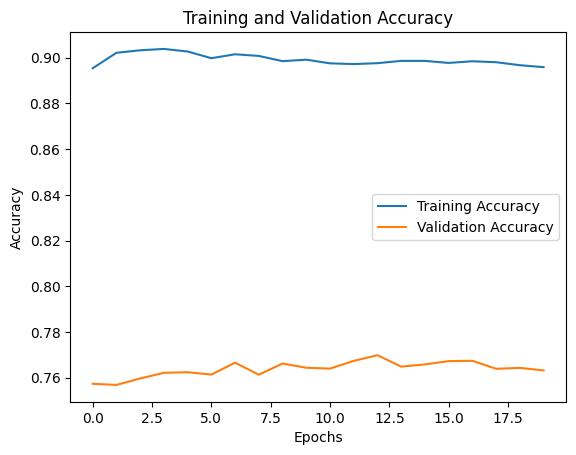

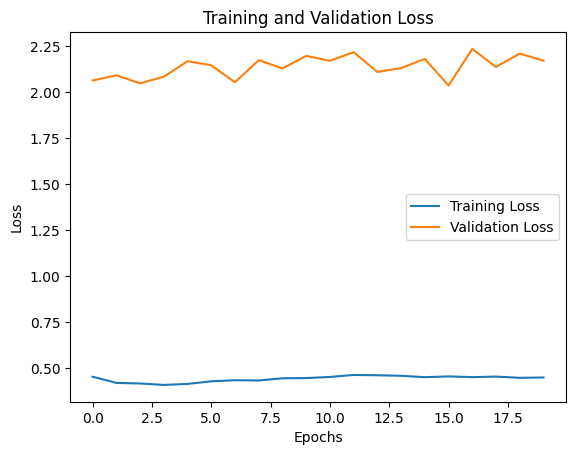

In [12]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
val_loss, val_acc = model.evaluate(val_generator)
tra_loss, tra_acc = model.evaluate(train_generator)
test_loss, test_acc = model.evaluate(test_generator)

print(f"Train Accuracy\t\t: {tra_acc * 100:.2f}% | Train Loss\t\t: {tra_loss}")
print(f"Validation Accuracy\t: {val_acc * 100:.2f}% | Validation Loss\t: {val_loss}")
print(f"Test Accuracy\t\t: {test_acc * 100:.2f}% | Test Loss \t\t: {test_loss}")

832/832 ━━━━━━━━━━━━━━━━━━━━ 238s 285ms/step - accuracy: 0.7647 - loss: 2.1513
2483/2483 ━━━━━━━━━━━━━━━━━━━━ 1130s 455ms/step - accuracy: 0.9285 - loss: 0.2767
1045/1046 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.7212 - loss: 3.3870

2024-12-10 10:28:07.821491: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4093', 4 bytes spill stores, 4 bytes spill loads

2024-12-10 10:28:07.963031: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4100', 24 bytes spill stores, 24 bytes spill loads



1046/1046 ━━━━━━━━━━━━━━━━━━━━ 317s 303ms/step - accuracy: 0.7212 - loss: 3.3870
Train Accuracy		: 92.83% | Train Loss		: 0.2765286862850189
Validation Accuracy	: 76.32% | Validation Loss	: 2.171438694000244
Test Accuracy		: 71.84% | Test Loss 		: 3.4114725589752197


In [18]:
model.save(r"../Deployed/food_recognition_model_EffNet_OPT_multiclass_("+str(test_acc*100)+"%).h5")

TypeError: cannot pickle 'module' object

In [19]:
model.save(r"../Deployed/food_recognition_model_EffNet_OPT_multiclass_("+str(test_acc*100)+"%).keras")